In [1]:
import fragment_analyzer
import matplotlib.pyplot as plt
from Bio import SeqIO
from pathlib import Path
import pandas as pd
import numpy as np

%load_ext jupyter_black

In [2]:
data = [
    x
    for x in Path("demo/230314 Testrun HEX and Multiplex/").iterdir()
    if x.suffix == ".fsa"
]

multiplex = [x for x in data if "multiplex" in x.stem]
hex_fam = data[2]
data

[PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_6_HEX_FAM_4091_F12_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_1_HEX_FAM_4091_A12_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_1_HEX_4091_A11_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRTmultiplex_2__4091_B10_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRTmultiplex_1__4091_A10_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_3_HEX_FAM_4091_C12_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_4_HEX_FAM_4091_D12_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_8_HEX_FAM_4091_H12_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_7_HEX_4091_G11_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRT2_6_HEX_4091_F11_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRTmultiplex_8__4091_H10_Dx.fsa'),
 PosixPath('demo/230314 Testrun HEX and Multiplex/PRTmultiplex_3__4091_C10_Dx.fsa'),


In [3]:
fsa = fragment_analyzer.FsaFile(multiplex[1], "LIZ", min_height=25)
pla = fragment_analyzer.PeakLadderAssigner(fsa)
model = fragment_analyzer.FitLadderModel(pla)
pam = fragment_analyzer.PeakAreaDeMultiplex(model, min_ratio=0.1)

11 peaks found in PRTmultiplex_1__4091_A10_Dx.fsa
4 assays in PRTmultiplex_1__4091_A10_Dx.fsa


In [4]:
dfs = []
for i in pam:
    pam.fit_assay_peaks("lorentzian", i)
    dfs.append(pam.assay_peak_area_df)

df = pd.concat(dfs).reset_index(drop=True)
df

,peak_height,basepairs,fitted_peak_height,model,area,peak_name,file_name,quotient,peak_number,assay_number
0,1940,141.227909,2070.305688,lorentzian,1095.326843,Peak 1,PRTmultiplex_1__4091_A10_Dx.fsa,1.112314,2,1
1,1982,151.526716,2043.766968,lorentzian,1218.347000,Peak 2,PRTmultiplex_1__4091_A10_Dx.fsa,1.112314,2,1
2,2386,195.403406,2530.144669,lorentzian,1459.187170,Peak 1,PRTmultiplex_1__4091_A10_Dx.fsa,2.553973,2,2
3,6124,198.475822,6438.067614,lorentzian,3726.724069,Peak 2,PRTmultiplex_1__4091_A10_Dx.fsa,2.553973,2,2
4,2640,228.666157,2827.080154,lorentzian,1432.774914,Peak 1,PRTmultiplex_1__4091_A10_Dx.fsa,0.947706,2,3
5,2407,233.130543,2491.750100,lorentzian,1357.849337,Peak 2,PRTmultiplex_1__4091_A10_Dx.fsa,0.947706,2,3
6,1557,265.148179,1609.477404,lorentzian,975.878035,Peak 1,PRTmultiplex_1__4091_A10_Dx.fsa,2.896115,5,4
7,946,268.452968,995.327434,lorentzian,606.794663,Peak 2,PRTmultiplex_1__4091_A10_Dx.fsa,2.896115,5,4
8,1230,271.535071,1311.204138,lorentzian,774.746454,Peak 3,PRTmultiplex_1__4091_A10_Dx.fsa,2.896115,5,4
9,1224,277.253592,1275.962353,lorentzian,791.479508,Peak 4,PRTmultiplex_1__4091_A10_Dx.fsa,2.896115,5,4


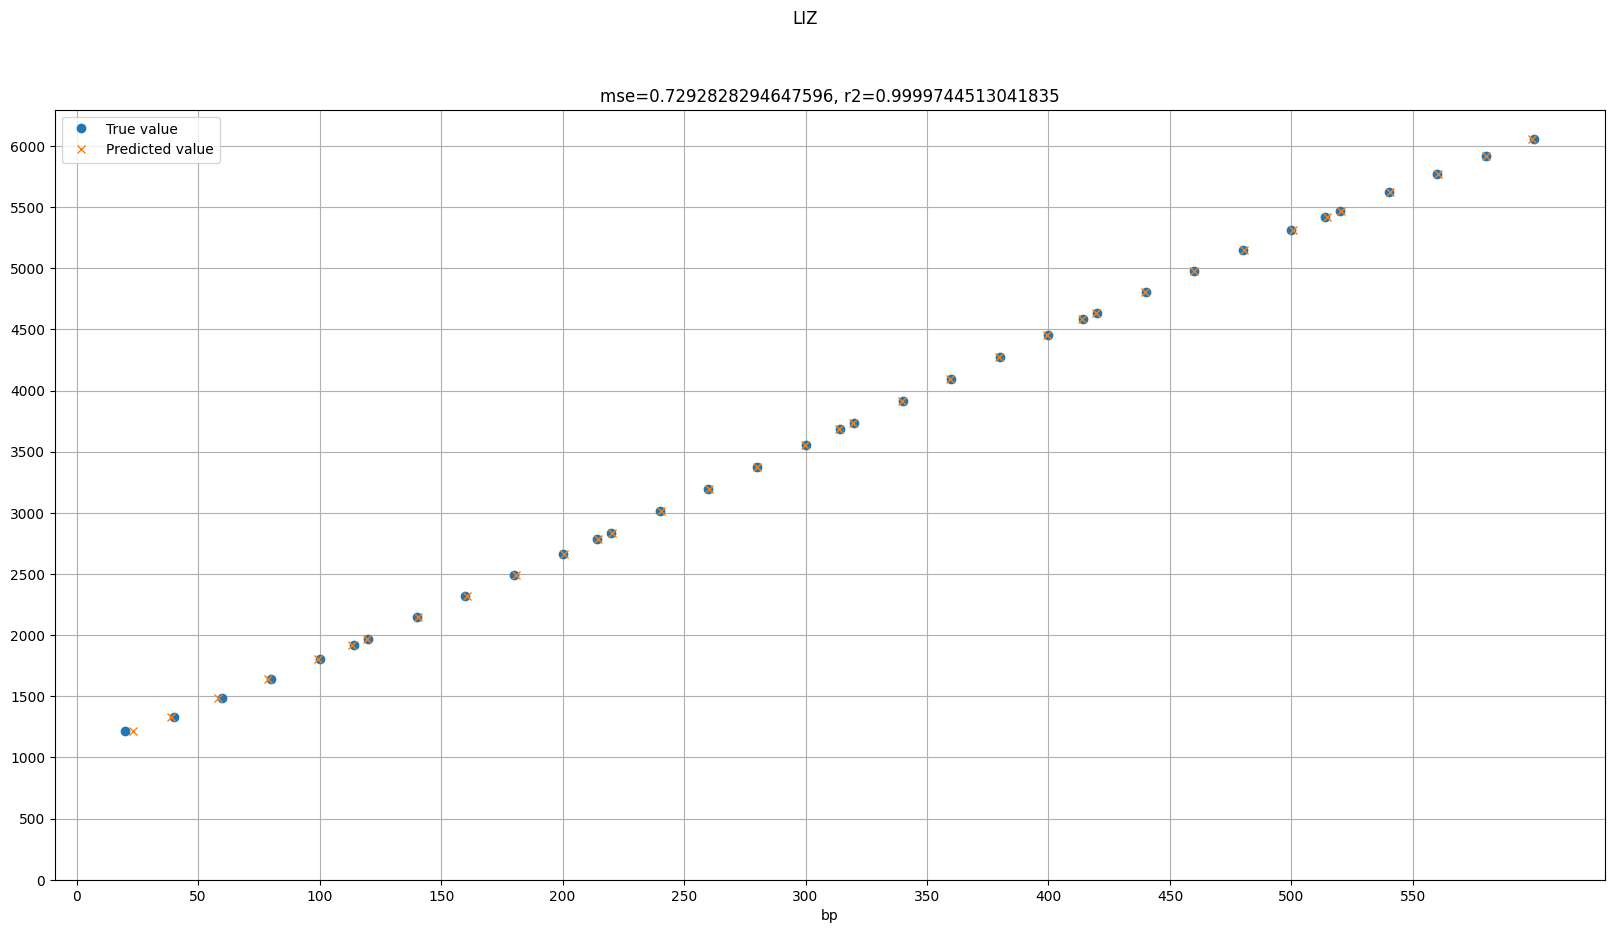

In [5]:
fragment_analyzer.PlotLadder(model).plot_ladder_peaks
fragment_analyzer.PlotLadder(model).plot_model_fit

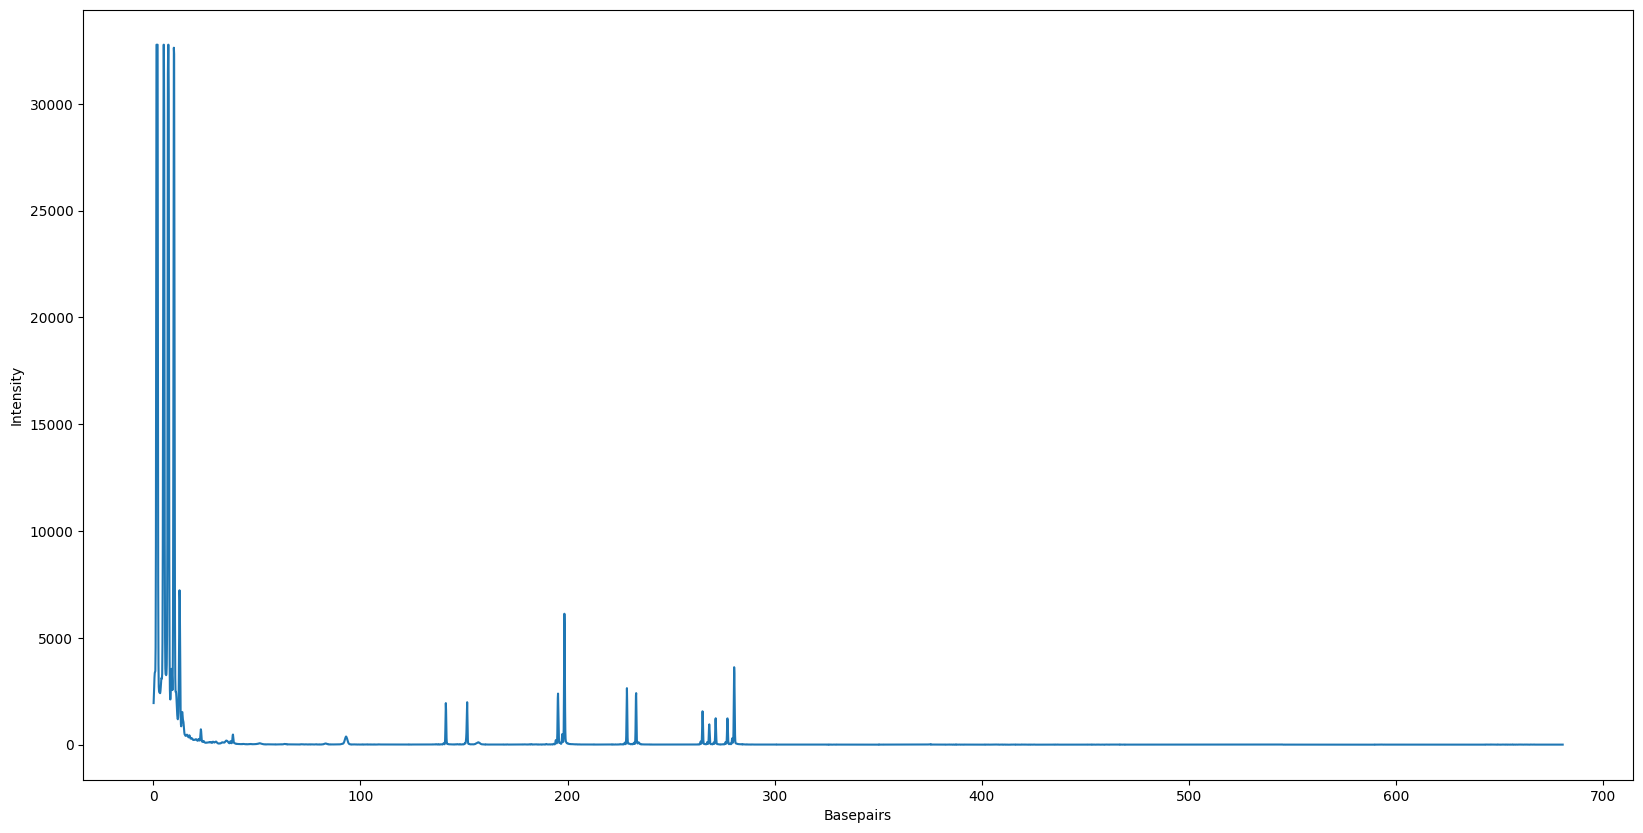

In [6]:
fragment_analyzer.PlotRawData(model).plot_raw_data

In [5]:
peak_plot = fragment_analyzer.PlotPeakArea(pam)

NameError: name 'pam' is not defined

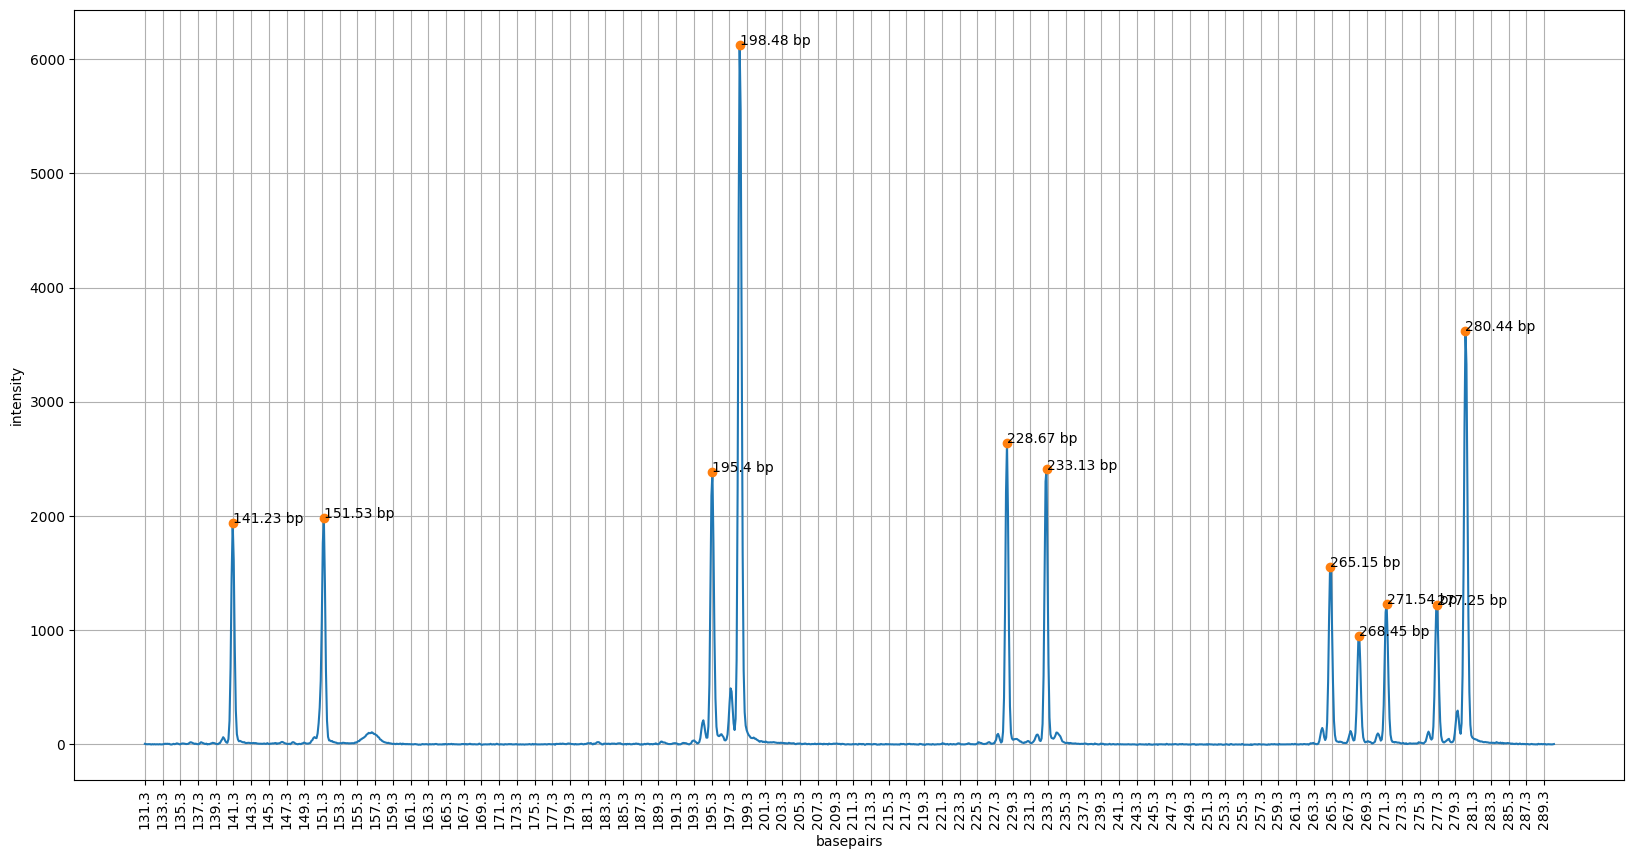

In [8]:
peak_plot.plot_peaks()

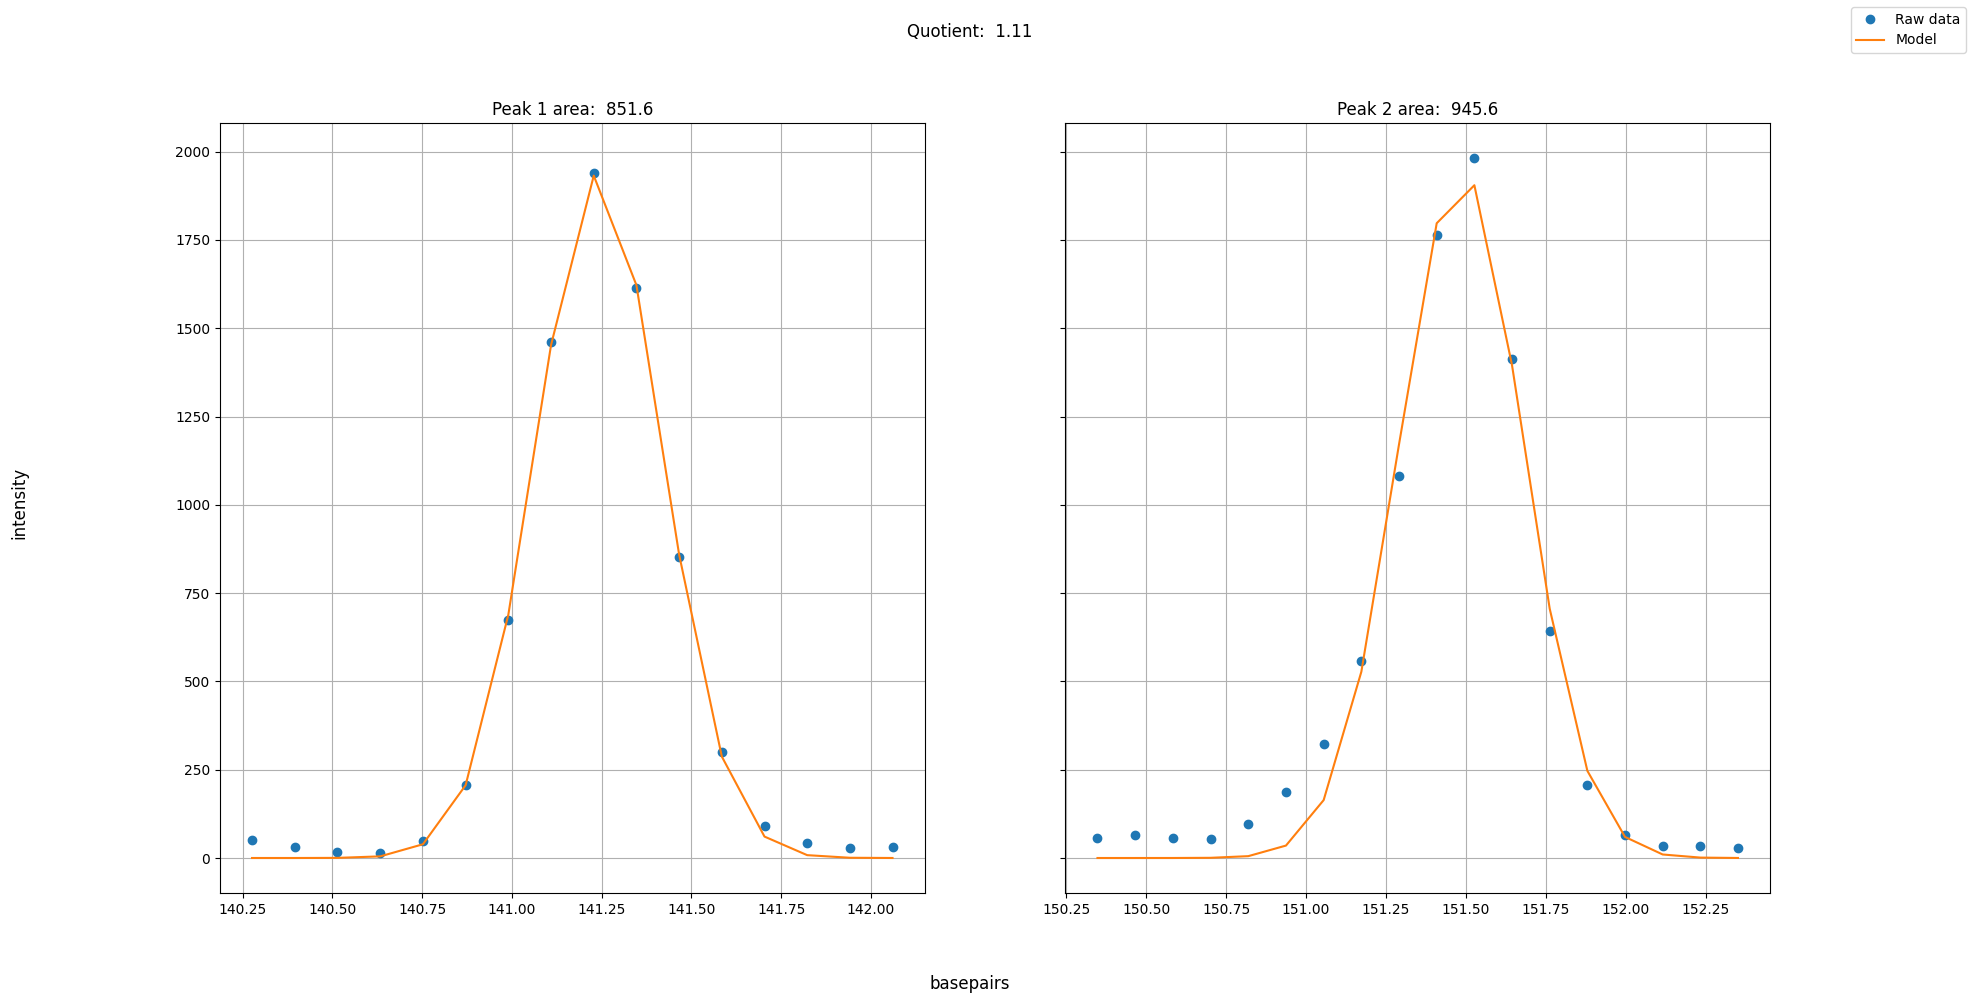

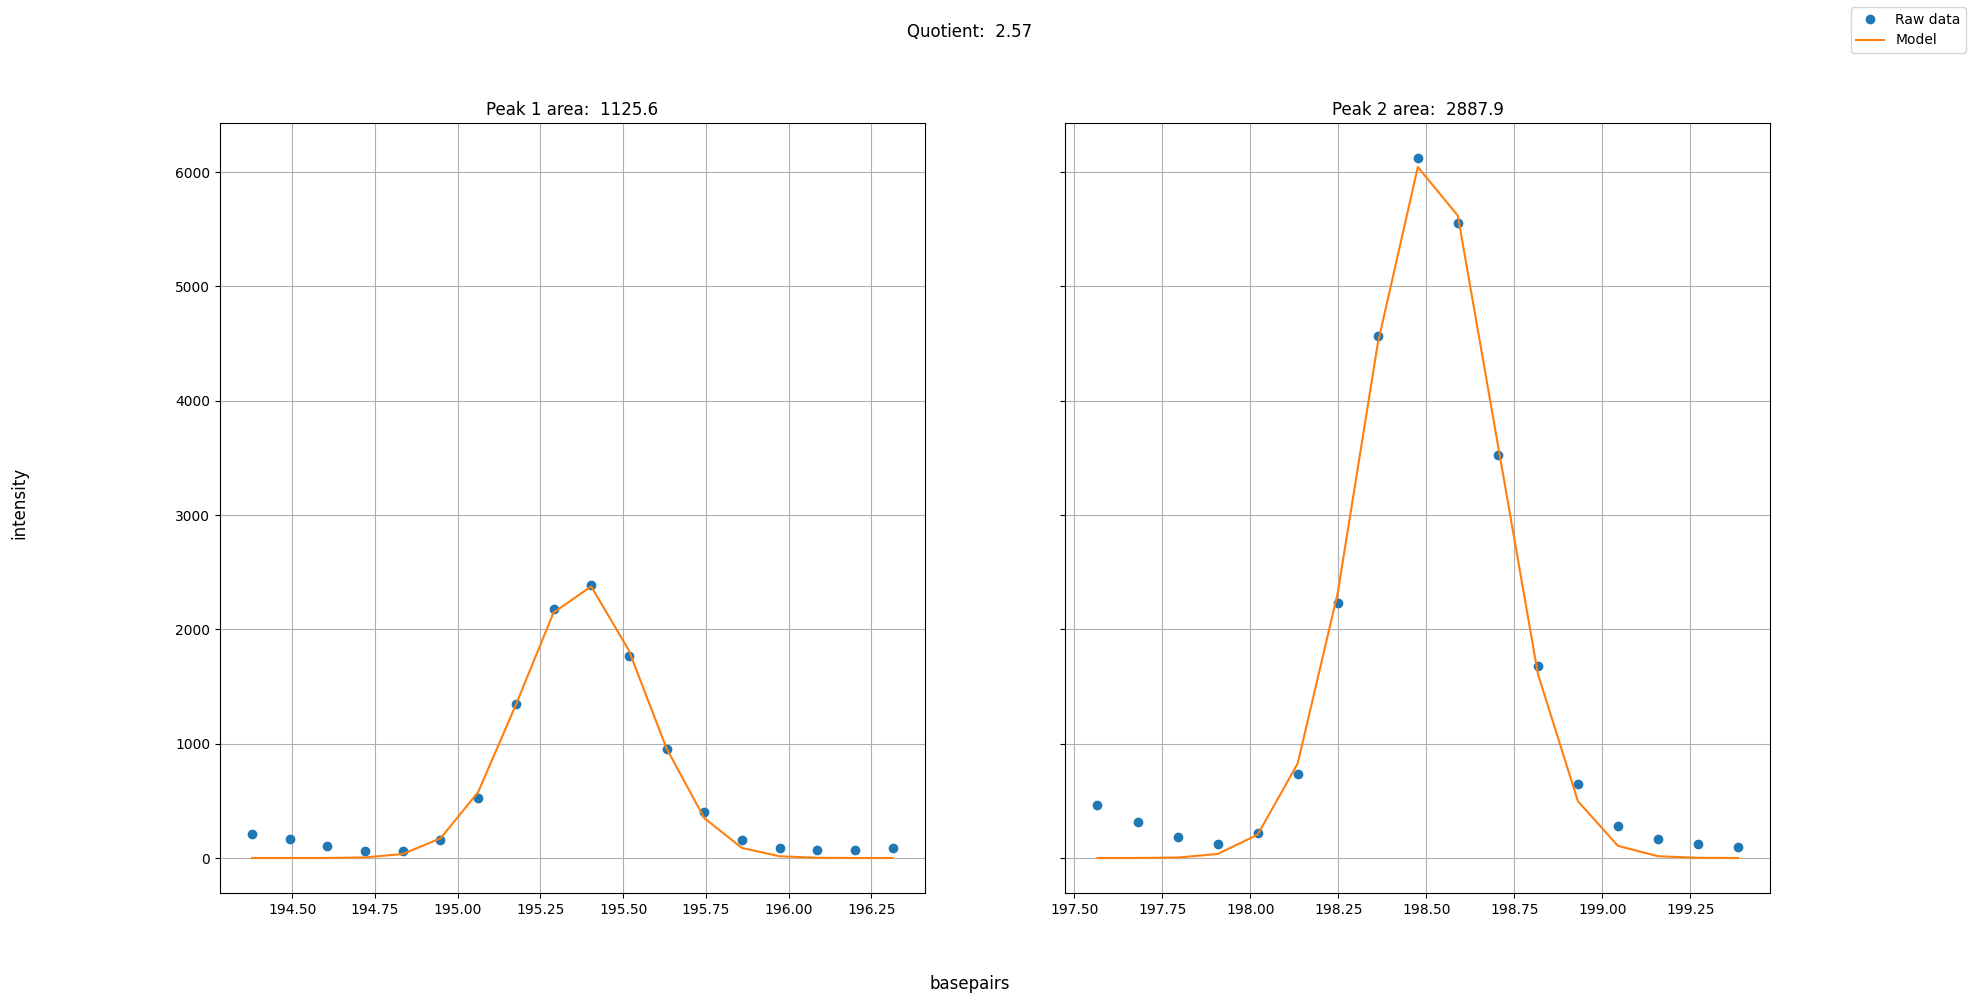

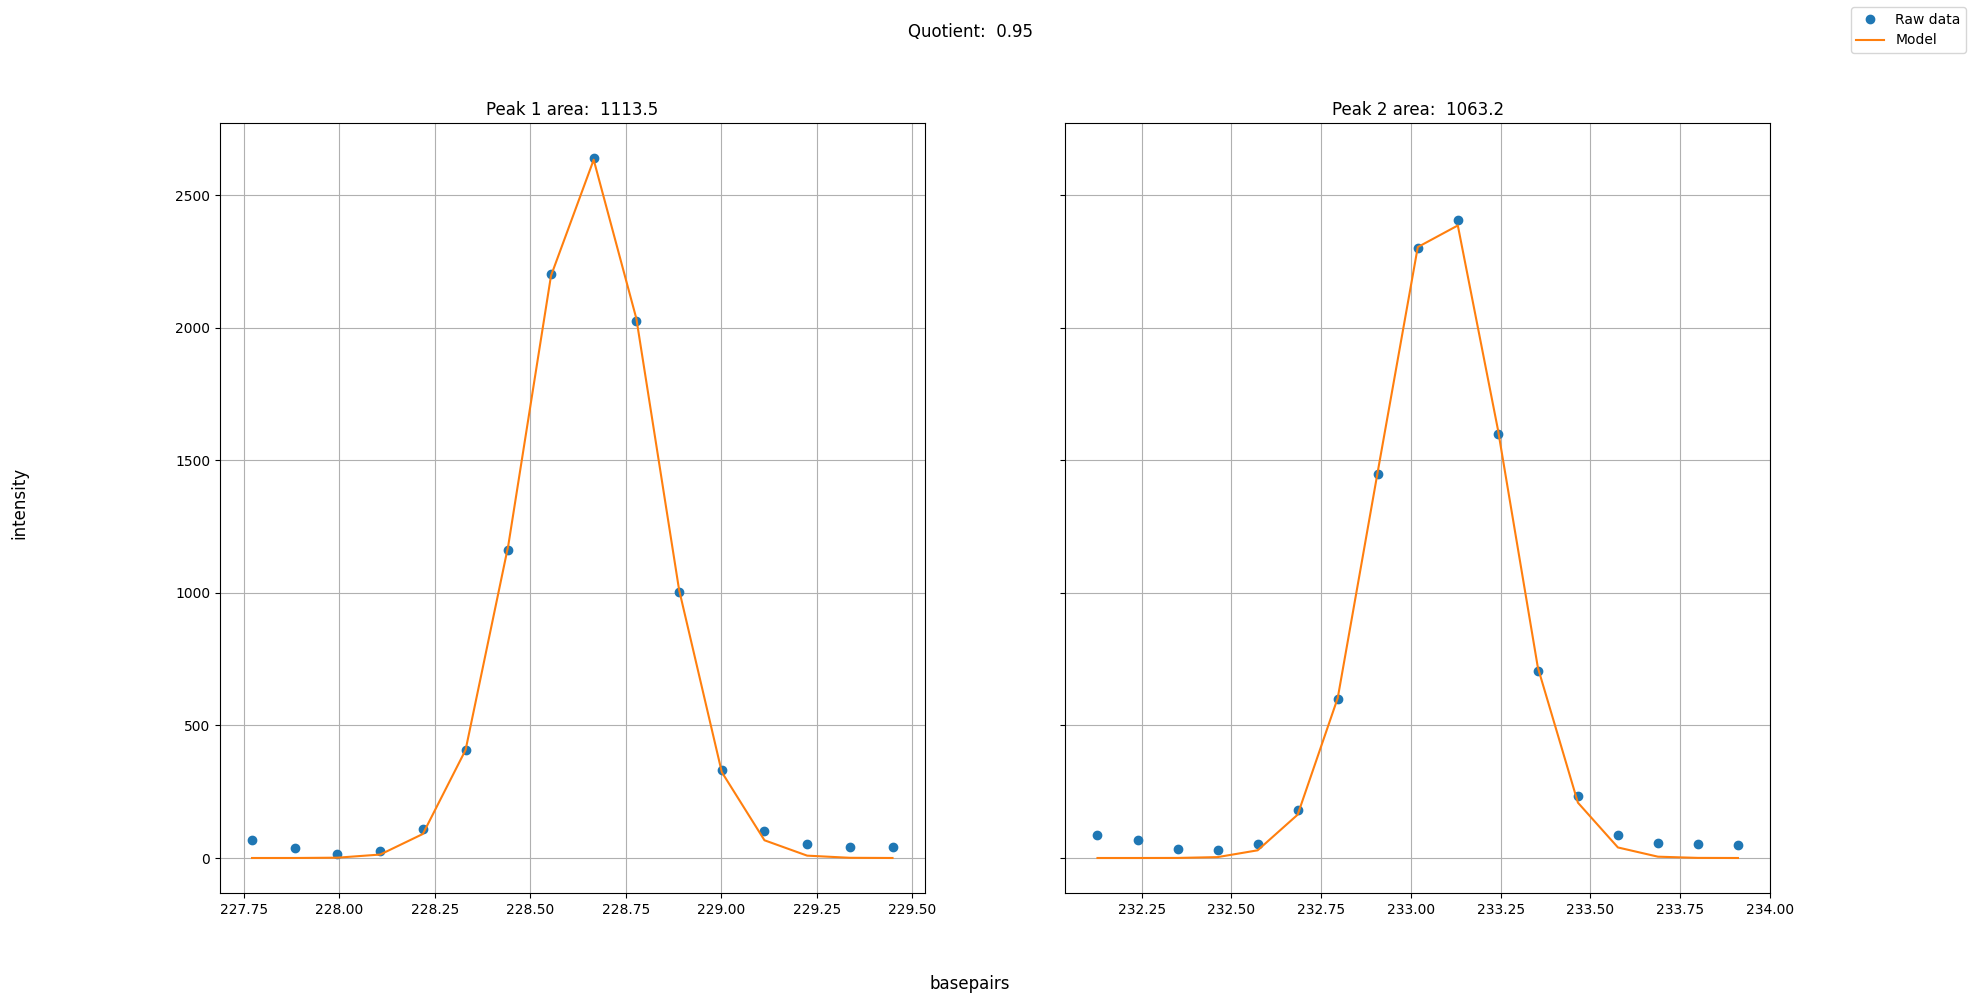

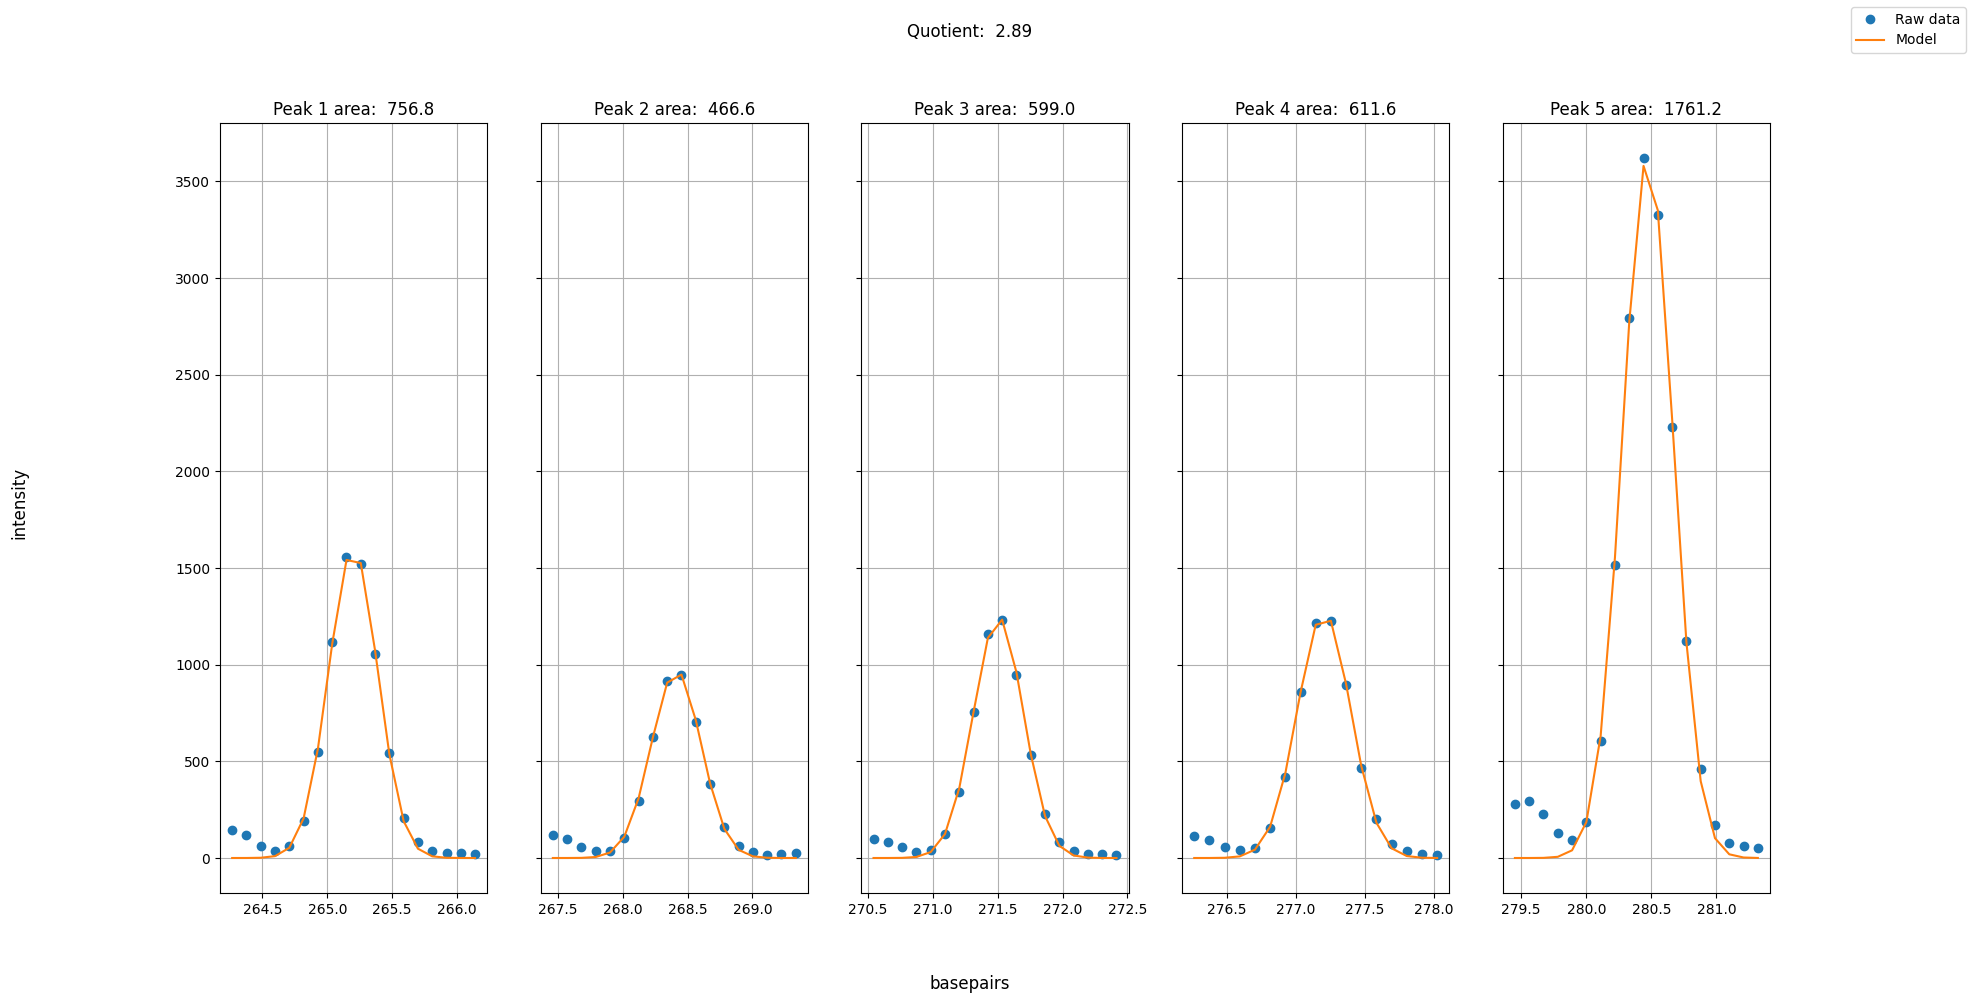

In [20]:
for i in pam:
    display(peak_plot.plot_areas("gauss", i))

In [4]:
# REPORT
fragment_analyzer.peak_area_report(
    fsa_file=multiplex[2],
    ladder="LIZ",
    folder="report_multiplex",
    peak_model="gauss",
    min_height=25,
)

11 peaks found in PRTmultiplex_8__4091_H10_Dx.fsa
4 assays in PRTmultiplex_8__4091_H10_Dx.fsa


0